<a href="https://colab.research.google.com/github/savagenashe/gdsc/blob/main/labAssignment1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PANASHE TARUWINGA**



*   09922023
*   MACHINE LEARNING LAB 1



In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.0 MB/s 
     |████████████████████████████████| 189 kB 44.8 MB/s 
     |████████████████████████████████| 1.2 MB 50.7 MB/s 
     |████████████████████████████████| 46 kB 5.8 MB/s 
     |████████████████████████████████| 56 kB 6.9 MB/s 
     |████████████████████████████████| 51 kB 459 kB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
#from sklearn.model_selection import train_test_split

matplotlib.rc('image', cmap='Greys')


**Downloading the dataset**



In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
#hide
Path.BASE_PATH = path

**Listing all the files in the dataset**

In [ ]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/7'),Path('training/3'),Path('training/0'),Path('training/8'),Path('training/4'),Path('training/6'),Path('training/2'),Path('training/9'),Path('training/1')]

Splitting the training set into training set and validation set using an 80-20 ratio

In [ ]:
ones_train = (path/'training'/'1').ls()
split_1 = int(len(ones_train)*0.8)
ones = ones_train[:split_1]
ones_valid = ones_train[split_1:]

threes_train = (path/'training'/'3').ls()
split_3 = int(len(threes_train)*0.8)
threes = threes_train[:split_3]
threes_valid = threes_train[split_3:]

eights_train = (path/'training'/'8').ls()
split_8 = int(len(eights_train)*0.8)
eights = eights_train[:split_8]
eights_valid = eights_train[split_8:]

sevens_train = (path/'training'/'7').ls()
split_7 = int(len(sevens_train)*0.8)
sevens = sevens_train[:split_7]
sevens_valid = sevens_train[split_7:]

#len(ones_valid),len(ones),len(threes_valid),len(threes),len(eights_valid),len(eights),len(sevens_valid),len(sevens)

number of images in each set

In [ ]:
# training
len(ones),len(threes),len(sevens),len(eights)

(5393, 4904, 5012, 4680)

In [ ]:
#validation set
len(ones_valid),len(threes_valid),len(sevens_valid),len(eights_valid)

(1349, 1227, 1253, 1171)

In [ ]:
#testing
ones_test = (path/'testing'/'1').ls()
threes_test = (path/'testing'/'3').ls()
eights_test = (path/'testing'/'8').ls()
sevens_test = (path/'testing'/'7').ls()

len(ones_test),len(threes_test),len(sevens_test),len(eights_test)


(1135, 1010, 1028, 974)

Taking a look at the 3,1,8 and 7s only

In [ ]:
threes = (path/'training/3').ls().sorted()
eights = (path/'training/8').ls().sorted()
ones = (path/'training/1').ls().sorted()
sevens = (path/'training/7').ls().sorted()
threes

(#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/3/10011.png'),Path('training/3/10031.png'),Path('training/3/10034.png'),Path('training/3/10042.png'),Path('training/3/10052.png'),Path('training/3/1007.png'),Path('training/3/10074.png'),Path('training/3/10091.png')...]

Taking a look at one image

In [ ]:
im8_path = eights[1]
im8 = Image.open(im8_path)
im8

displaying the numpy array of the above image

In [ ]:
array(im8)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,  58, 125, 245, 187, 254],
       [  0, 118, 253, 253, 253, 253],
       [  0, 242, 253, 253, 253, 253],
       [  0, 194, 253, 253, 253, 253],
       [  0,  73, 198, 253, 253, 253]], dtype=uint8)

In [ ]:
tensor(im8)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,  58, 125, 245, 187, 254],
        [  0, 118, 253, 253, 253, 253],
        [  0, 242, 253, 253, 253, 253],
        [  0, 194, 253, 253, 253, 253],
        [  0,  73, 198, 253, 253, 253]], dtype=torch.uint8)

showing the pixel values of the image using Pandas DataFrame

In [ ]:
im8_t = tensor(im8)
df = pd.DataFrame(im8_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,58,125,245,187,254,255,214,125,225,157,35,0,0,0,0,0,0
2,0,118,253,253,253,253,253,253,253,253,253,249,136,0,0,0,0,0
3,0,242,253,253,253,253,253,253,253,253,253,253,251,137,0,0,0,0
4,0,194,253,253,253,253,108,19,56,48,140,253,253,250,235,235,225,46
5,0,73,198,253,253,253,245,188,71,76,201,253,253,253,253,253,195,68
6,0,0,14,152,197,253,253,253,244,246,253,253,253,239,162,82,13,0
7,0,0,0,0,15,152,240,253,253,253,253,253,253,170,0,0,0,0
8,0,0,0,0,0,0,215,253,253,253,253,253,253,191,0,0,0,0
9,0,0,0,0,0,26,226,253,233,81,148,233,253,245,185,28,0,0


Creating a tensor of stacked numbers 

In [ ]:
eight_tensors = [tensor(Image.open(o)) for o in eights]
three_tensors = [tensor(Image.open(o)) for o in threes]
one_tensors = [tensor(Image.open(o)) for o in ones]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors),len(one_tensors),len(eight_tensors),len(seven_tensors)

(6131, 6742, 5851, 6265)

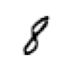

In [ ]:
show_image(eight_tensors[6])

Stacking the images and displaying the shape

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_eights.shape

torch.Size([5851, 28, 28])

In [ ]:
len(stacked_eights.shape)

3

In [ ]:
stacked_threes.ndim

3

Calculating the mean of all images and displaying what an ideal 8 looks like

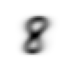

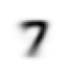

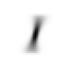

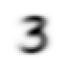

In [ ]:
mean8 = stacked_eights.mean(0)
show_image(mean8);

mean7 = stacked_sevens.mean(0)
show_image(mean7);

mean1 = stacked_ones.mean(0)
show_image(mean1);

mean3 = stacked_threes.mean(0)
show_image(mean3);

Measuring distance of ideal digits


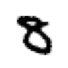

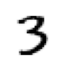

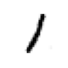

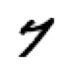

In [ ]:
a_8 = stacked_eights[1]
show_image(a_8);

a_3 = stacked_threes[1]
show_image(a_3);

a_1 = stacked_ones[1]
show_image(a_1);

a_7 = stacked_sevens[1]
show_image(a_7);

using L1 norm and L2 norm

In [ ]:
dist_8_abs = (a_8 - mean8).abs().mean()
dist_8_sqr = ((a_8 - mean8)**2).mean().sqrt()
dist_8_abs,dist_8_sqr


(tensor(0.1959), tensor(0.3387))

In [ ]:
dist_7_abs = (a_8 - mean7).abs().mean()
dist_7_sqr = ((a_8 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1984), tensor(0.3574))

the Loss function

In [ ]:
F.l1_loss(a_8.float(),mean7), F.mse_loss(a_8,mean7).sqrt()

(tensor(0.1984), tensor(0.3574))

Computing Metrics using Broadcasting

In [ ]:
#THREES
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (threes_valid)])
valid_3_tens = valid_3_tens.float()/255
#EIGHTS
valid_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (eights_valid)])
valid_8_tens = valid_8_tens.float()/255
#ONES
valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (ones_valid)])
valid_1_tens = valid_1_tens.float()/255
#SEVENS
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (sevens_valid)])
valid_7_tens = valid_7_tens.float()/255

#DISPLAYING THE SHAPES AND THE IMAGE SIZES
valid_3_tens.shape,valid_1_tens.shape,valid_7_tens.shape,valid_8_tens.shape



(torch.Size([1227, 28, 28]),
 torch.Size([1349, 28, 28]),
 torch.Size([1253, 28, 28]),
 torch.Size([1171, 28, 28]))

test set

In [ ]:
#SEVENS
test_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'7').ls()])
test_7_tens = test_7_tens.float()/255

#EIGHTS
test_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'8').ls()])
test_8_tens = test_8_tens.float()/255

#ONES
test_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'1').ls()])
test_1_tens = test_1_tens.float()/255

#THREES
test_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'3').ls()])
test_3_tens = test_3_tens.float()/255

test_3_tens.shape,test_7_tens.shape,test_1_tens.shape,test_8_tens.shape


(torch.Size([1010, 28, 28]),
 torch.Size([1028, 28, 28]),
 torch.Size([1135, 28, 28]),
 torch.Size([974, 28, 28]))

Function to calculate the mean absolute error using Broadcasting

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(a_3, mean3),mnist_distance(a_1, mean1),mnist_distance(a_7, mean7),mnist_distance(a_8, mean8)

(tensor(0.1114), tensor(0.0601), tensor(0.1304), tensor(0.1959))

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_1_dist = mnist_distance(valid_1_tens, mean1)
valid_7_dist = mnist_distance(valid_7_tens, mean7)
valid_8_dist = mnist_distance(valid_8_tens, mean8)

(valid_3_dist, valid_3_dist.shape),(valid_1_dist, valid_1_dist.shape),(valid_8_dist, valid_8_dist.shape),(valid_7_dist, valid_7_dist.shape)

((tensor([0.1133, 0.1359, 0.1709,  ..., 0.1250, 0.1395, 0.1188]),
  torch.Size([1227])),
 (tensor([0.0640, 0.0752, 0.0627,  ..., 0.0926, 0.0767, 0.0586]),
  torch.Size([1349])),
 (tensor([0.1163, 0.1127, 0.1463,  ..., 0.1091, 0.1983, 0.1189]),
  torch.Size([1171])),
 (tensor([0.0995, 0.0879, 0.1295,  ..., 0.1074, 0.0996, 0.0891]),
  torch.Size([1253])))

**Classifying images**

In [ ]:
#THREES
def is_3(x): 
  return (((mnist_distance(x,mean3) < mnist_distance(x,mean7))<mnist_distance(x,mean1))<mnist_distance(x,mean8))

#SEVENS
def is_7(x): 
  return (((mnist_distance(x,mean7) < mnist_distance(x,mean3))<mnist_distance(x,mean1))<mnist_distance(x,mean8))

#EIGHTS
def is_8(x): 
  return (((mnist_distance(x,mean8) < mnist_distance(x,mean7))<mnist_distance(x,mean1))<mnist_distance(x,mean3))

#ONES
def is_1(x): 
  return (((mnist_distance(x,mean1) < mnist_distance(x,mean7))<mnist_distance(x,mean3))<mnist_distance(x,mean8))

TESTING

In [ ]:
#if seven is a 3
is_3(a_7), is_3(a_7).float()

(tensor(False), tensor(0.))

In [ ]:
#if 8 is an 8
is_8(a_8), is_8(a_8).float()

(tensor(True), tensor(1.))

Testing the full validation sets

In [ ]:
#threes
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True,  True,  True])

In [ ]:
#eights
is_8(valid_3_tens)

tensor([ True,  True, False,  ..., False,  True,  True])

In [ ]:
#sevens
is_7(valid_7_tens)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
#ones
is_1(valid_1_tens)

tensor([True, True, True,  ..., True, True, True])

**Calculating the accuracies**

In [ ]:
#accuracy for ones on ones
accuracy_1s =      is_1(valid_1_tens).float() .mean()
accuracy_1s

tensor(0.9993)

In [ ]:
#accuracy for three on three
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_3s

tensor(0.9022)

In [ ]:
#accuracy for sevens on sevens
accuracy_7s =      is_7(valid_7_tens).float() .mean()
accuracy_7s

tensor(0.9984)

In [ ]:
#accuracy for eights on eights
accuracy_8s =      is_8(valid_8_tens).float() .mean()
accuracy_8s

tensor(0.9052)

testing acccuracies of values against other values

In [ ]:
#accuracy for ones on eights
accuracy_1s8 =      is_1(valid_8_tens).float() .mean()
accuracy_1s8

tensor(0.8753)

In [ ]:
#accuracy for ones on sevens
accuracy_1s7 =      is_1(valid_7_tens).float() .mean()
accuracy_1s7

tensor(0.1860)

In [ ]:
#accuracy for three on eights
accuracy_3s8 =      is_3(valid_8_tens).float() .mean()
accuracy_3s8

tensor(0.5482)

In [ ]:
#accuracy for ones on sevens
accuracy_7s8 =      is_7(valid_8_tens).float() .mean()
accuracy_7s8

tensor(0.4518)

**Accuracy of the classifier for the test set**

In [ ]:
#accuracy for ones on ones
accuracy_1s_test =is_1(test_1_tens).float() .mean()
accuracy_1s_test

tensor(1.)

In [ ]:
#accuracy for eights on eights
accuracy_8s_test =is_8(test_8_tens).float() .mean()
accuracy_8s_test

tensor(0.9055)

In [ ]:
#accuracy for three on threes
accuracy_3s_test =is_3(test_3_tens).float() .mean()
accuracy_3s_test

tensor(0.9168)

In [ ]:
#accuracy for sevens on sevens
accuracy_7s_test =is_7(test_7_tens).float() .mean()
accuracy_7s_test

tensor(0.9854)

testings value accuracies against other values

In [ ]:
#accuracy for ones on eights
accuracy_1s8_test =      is_1(test_8_tens).float() .mean()
accuracy_1s8_test

tensor(0.8439)

In [ ]:
#accuracy for ones on sevens
accuracy_1s7_test =      is_1(test_7_tens).float() .mean()
accuracy_1s7_test

tensor(0.2062)

In [ ]:
#accuracy for three on eights
accuracy_3s8_test =      is_3(test_8_tens).float() .mean()
accuracy_3s8_test

tensor(0.5729)

In [ ]:
#accuracy for ones on sevens
accuracy_7s8_test =      is_7(test_8_tens).float() .mean()
accuracy_7s8_test

tensor(0.4271)